# Handwritten Digit Recognition

Rahul Kumar  ||  rahul.cs068@gmail.com  ||  +91-9538109454

  --------------------------------------------------

# Problem Statement

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.
The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

<b>Objective</b>
You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

Data Description
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. MNIST digit recognition is a well-studied problem in the ML community, and people have trained numerous models (Neural Networks, SVMs, boosted trees etc.) achieving error rates as low as 0.23% (i.e. accuracy = 99.77%, with a convolutional neural network).

Before the popularity of neural networks, though, models such as SVMs and boosted trees were the state-of-the-art in such problems.

This webpage (from the original contributors of the dataset) tabulates the accuracies achieved by various classification models. 

In this assignment, try experimenting with various hyperparameters in SVMs and observe the highest accuracy you can get. With a sub-sample of 10-20% of the training data (see note below), you should expect to get an accuracy of more than 90%.


<b>Important Note</b>
Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, so you can sub-sample the data for training (10-20% of the data should be enough to achieve decent accuracy). Also, running a GridSearchCV() may take hours if you use a large value of k (fold-CV) such as 10 and a wide range of hyperparameters; k = 5 should be sufficient. Also, check the class-wise accuracy so as to make sure the results aren't skewed

You can download the dataset from Kaggle here - https://www.kaggle.com/c/digit-recognizer/data
please use train.csv to train the model and test.csv to evaluate the results. 

# Data Load

## Import required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

## Load Data set

In [2]:
numbers_train = pd.read_csv("C:/Users/KUR9KOR/Desktop/DataScience/Course_4/5_SupportVectorMachines_Assignment/train.csv")
numbers_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("In Train dataset, Number of columns:", numbers_train.shape[1])
print("In Train dataset, Number of rows:", numbers_train.shape[0])

In Train dataset, Number of columns: 785
In Train dataset, Number of rows: 42000


In [4]:
numbers_test = pd.read_csv("C:/Users/KUR9KOR/Desktop/DataScience/Course_4/5_SupportVectorMachines_Assignment/test.csv")
numbers_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("In Test dataset, Number of columns:", numbers_test.shape[1])
print("In Test dataset, Number of rows:", numbers_test.shape[0])

In Test dataset, Number of columns: 784
In Test dataset, Number of rows: 28000


## Data Inspection

In [6]:
print("Train dataset, Number of columns, rows:", numbers_train.shape)
print("Test dataset, Number of columns, rows:", numbers_test.shape)

Train dataset, Number of columns, rows: (42000, 785)
Test dataset, Number of columns, rows: (28000, 784)


In [7]:
print("-------------- Train data set -------------")
print(numbers_train.columns)

-------------- Train data set -------------
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
print("-------------- Test data set -------------")
print(numbers_train.columns)

-------------- Test data set -------------
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [9]:
print("-------------- Train data set -------------")
numbers_train.info()

-------------- Train data set -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
print("-------------- Test data set -------------")
numbers_test.info()

-------------- Test data set -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [11]:
numbers_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
numbers_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## Data Cleaning

#### Checking for nulls

In [13]:
numbers_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

#### Check NaN

In [14]:
numbers_train.isna().sum().any()

False

<font color="Blue"><b>Obervation: </b> no NaN values found</font>

## Data Preparation

In [15]:
order = list(np.sort(numbers_train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
numbers_train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

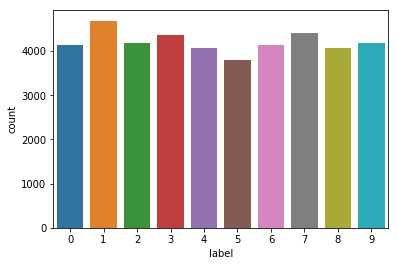

In [17]:
sns.countplot(numbers_train['label'])
plt.show()

#### Converting the pixel data into images

Text(0.5, 1.0, 'Digit 1')

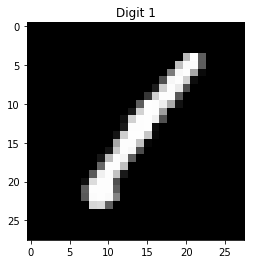

In [18]:
one = numbers_train.iloc[numbers_train[numbers_train.label==1].index[0], 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 2')

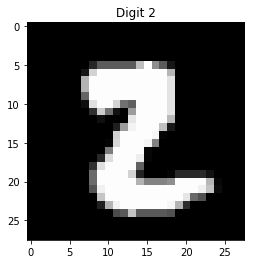

In [19]:
two = numbers_train.iloc[numbers_train[numbers_train.label==2].index[0], 1:]
two.shape
two = two.values.reshape(28,28)
plt.imshow(two, cmap='gray')
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 3')

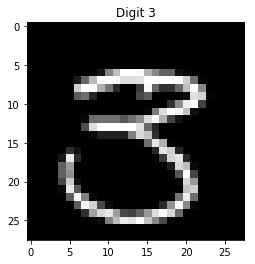

In [20]:
three = numbers_train.iloc[numbers_train[numbers_train.label==3].index[0], 1:]
three.shape
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

Text(0.5, 1.0, 'Digit 4')

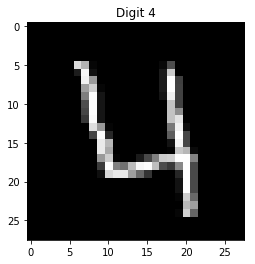

In [21]:
four = numbers_train.iloc[numbers_train[numbers_train.label==4].index[0], 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 5')

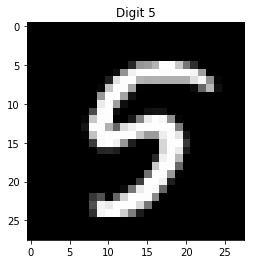

In [22]:
five = numbers_train.iloc[numbers_train[numbers_train.label==5].index[0], 1:]
five.shape
five = five.values.reshape(28,28)
plt.imshow(five, cmap='gray')
plt.title("Digit 5")

Text(0.5, 1.0, 'Digit 8')

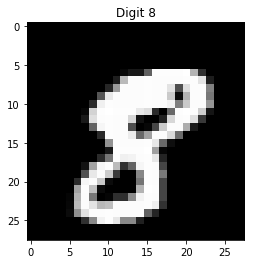

In [23]:
eight = numbers_train.iloc[numbers_train[numbers_train.label==8].index[0], 1:]
eight.shape
eight = eight.values.reshape(28,28)
plt.imshow(eight, cmap='gray')
plt.title("Digit 8")

In [24]:
numbers_train_means = numbers_train.groupby('label').mean()
numbers_train_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Split

The given data set is huge, processing all will take lot of time and personal laptops will not be suitable for it. So, we will split the given train data into <b><i>train</i></b> and <b><i>test</i></b> taking may be only 10-20% of data to train

In [25]:
numbers_train_sample,numbers_test_sample = train_test_split(numbers_train,test_size = 0.8, random_state = 4)

##### Train data(20% of the train data)

In [26]:
numbers_train_sample.shape

(8400, 785)

##### Test data(80% of the train data)

In [27]:
numbers_test_sample.shape

(33600, 785)

#### spliting into X and Y

In [28]:
x = numbers_train_sample.drop("label", axis = 1)
y = numbers_train_sample.label.values.astype(int)

#### Spliting the test data

In [29]:
xtest = numbers_test_sample.drop("label", axis = 1)
ytest = numbers_test_sample.label.values.astype(int)

### Feature Scaling

#### Train data

In [30]:
### Scale the train data
X = scale(x)

C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


#### Test data

In [31]:
### Scale the test data
Xtest = scale(xtest)

C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [32]:
# split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [33]:
print('Train data --- ', X_train.shape)
print('Test data -----', X_test.shape)

Train data ---  (5880, 784)
Test data ----- (2520, 784)


# Model Building

### 1. Linear model

In [34]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
# predict
y_pred = model_linear.predict(X_test)


##### Confusion matrix and accuracy

In [36]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.903968253968254 

[[267   0   0   0   0   3   2   0   1   0]
 [  0 260   4   1   0   0   1   1   1   0]
 [  2   3 192   4   3   3   2   4   4   0]
 [  2   2  12 225   3   7   2   2   4   0]
 [  1   2   1   1 249   1   0   0   0  11]
 [  5   3   3   8   1 191   3   0   4   1]
 [  8   2   3   0   3   4 219   0   0   0]
 [  0   2   2   2   2   0   0 247   0  13]
 [  3   5   2   5   0  11   2   6 205   1]
 [  2   1   1   8  19   1   0  11   5 223]]


The linear model gives <b>approx. 90%</b> accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.93      0.97      0.95       268
           2       0.87      0.88      0.88       217
           3       0.89      0.87      0.88       259
           4       0.89      0.94      0.91       266
           5       0.86      0.87      0.87       219
           6       0.95      0.92      0.93       239
           7       0.91      0.92      0.92       268
           8       0.92      0.85      0.88       240
           9       0.90      0.82      0.86       271

   micro avg       0.90      0.90      0.90      2520
   macro avg       0.90      0.90      0.90      2520
weighted avg       0.90      0.90      0.90      2520



### 2. Non-Linear model

using rbf kernel, C=1, default value of gamma

In [38]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
# predict
y_pred = non_linear_model.predict(X_test)

##### Confusion matrix and accuracy

In [40]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.930952380952381 

[[265   0   0   0   0   0   4   2   2   0]
 [  0 259   2   0   1   0   2   2   2   0]
 [  1   0 198   3   2   0   1   8   4   0]
 [  0   1   9 230   0   7   1   5   5   1]
 [  0   0   3   0 252   1   2   1   0   7]
 [  3   1   0   1   3 197   8   3   2   1]
 [  1   0   4   0   1   5 226   1   1   0]
 [  0   2   1   1   1   0   0 253   1   9]
 [  2   2   3   3   0   6   1   3 220   0]
 [  2   0   3   9   4   0   0   4   3 246]]


The non-linear model gives approx. <b>93% </b> accuracy. So, compare to linear model now we have more accuracy in non-linear model and this is something expected too.
Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       273
           1       0.98      0.97      0.97       268
           2       0.89      0.91      0.90       217
           3       0.93      0.89      0.91       259
           4       0.95      0.95      0.95       266
           5       0.91      0.90      0.91       219
           6       0.92      0.95      0.93       239
           7       0.90      0.94      0.92       268
           8       0.92      0.92      0.92       240
           9       0.93      0.91      0.92       271

   micro avg       0.93      0.93      0.93      2520
   macro avg       0.93      0.93      0.93      2520
weighted avg       0.93      0.93      0.93      2520



### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

#### a KFold object with 5 splits 

In [42]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)


#### range of hyperparameters,  parameters by cross-validation

In [43]:
#hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
#                     'C': [1, 10, 100, 1000]}]

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [44]:
# specify model
model = SVC(kernel="rbf")

In [45]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        n_jobs = -1,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [46]:
# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 18.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [47]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,167.343787,0.882768,19.928901,1.228872,1,0.01,"{'C': 1, 'gamma': 0.01}",0.719388,0.703231,0.713435,...,0.716837,0.010689,12,0.999787,0.999787,1.000000,1.000000,1.000000,0.999915,0.000104
1,47.898644,2.820369,12.280268,0.212138,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926871,0.910714,0.910714,...,0.919728,0.007464,4,0.969813,0.970238,0.970663,0.971301,0.968963,0.970196,0.000789
2,65.373198,3.549088,14.733206,1.036735,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.888605,0.888605,0.888605,...,0.889796,0.002381,8,0.910077,0.910714,0.911777,0.908801,0.908801,0.910034,0.001144
3,153.419750,1.311101,18.210900,0.569876,10,0.01,"{'C': 10, 'gamma': 0.01}",0.738946,0.716837,0.729592,...,0.734014,0.010908,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,35.448465,0.747925,9.853997,0.480194,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941327,0.926020,0.918367,...,0.930612,0.007823,1,0.998087,0.998724,0.998724,0.999150,0.998724,0.998682,0.000340
5,28.341847,0.469966,10.040778,0.548897,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920068,0.909864,0.919218,...,0.918707,0.004582,5,0.961522,0.959396,0.958971,0.958546,0.958333,0.959354,0.001144
6,154.484028,10.617234,18.847411,1.546906,100,0.01,"{'C': 100, 'gamma': 0.01}",0.738946,0.716837,0.729592,...,0.734014,0.010908,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,36.276913,3.341900,9.605569,0.610830,100,0.001,"{'C': 100, 'gamma': 0.001}",0.937925,0.924320,0.918367,...,0.929422,0.007074,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,22.011420,1.780619,7.573374,0.712879,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.915816,0.911565,0.916667,...,0.917347,0.005877,6,0.994260,0.996173,0.994685,0.995961,0.993622,0.994940,0.000983
9,152.810004,2.552209,17.251079,2.241612,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.738946,0.716837,0.729592,...,0.734014,0.010908,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


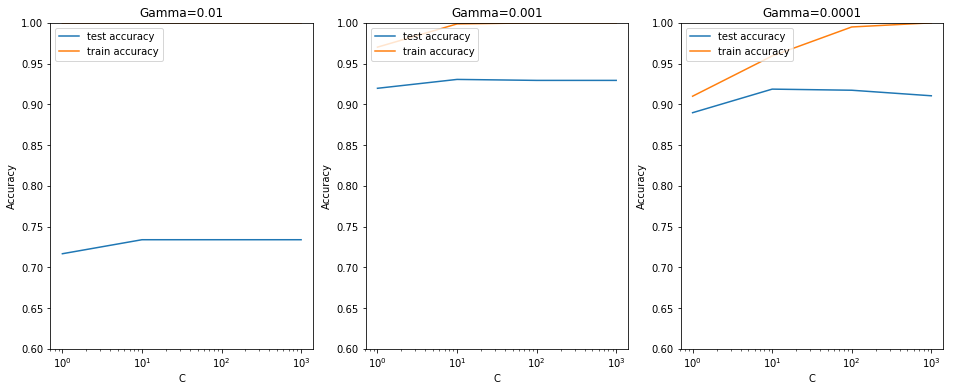

In [48]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [49]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9306122448979591 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [50]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9341269841269841 

[[265   0   0   0   0   0   5   0   2   1]
 [  0 259   3   0   0   0   3   1   2   0]
 [  1   3 202   0   1   1   5   3   1   0]
 [  0   0   9 234   1   7   4   2   2   0]
 [  0   1   3   0 252   1   2   0   0   7]
 [  4   2   1   3   1 196   7   1   2   2]
 [  2   0   2   0   2   3 230   0   0   0]
 [  0   2   3   1   1   0   6 248   0   7]
 [  1   2   3   2   0   5   1   2 223   1]
 [  2   1   3   7   5   2   1   4   1 245]] 



## Conclusion

The accuracy achieved using a non-linear kernel (~0.93) is quite higher than that of a linear one (~0.90). We can conclude that the problem is highly non-linear in nature.

----------------------------------------